In [1]:
import numpy as np
import breakwater as bw
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
MSL = 7
LW, HW = MSL-1, MSL+1
wlevs = [MSL, LW, HW]
label = ['MSL', 'LW', 'HW']

## <center> Trucks

<div class="alert alert-block alert-info">
    
Equipment:
CT660s caterpillar
1. operation_type: bulk

#### Building at own level

<img src="Images/truck1.PNG" alt="Drawing" style="width: 700px;"/>


<div class="alert alert-block alert-success">

<center>Install: $y_{start} - y_{waterlvl} \geq h_{dry}$

In [3]:
h_dry = 1

Truck = bw.Truck(
                name = 'CT660s', 
                design_type = {'LMA_60/300': {'cost': 310, 'CO2': 2, 'production_rate': 0.8}}, 
                mobilisation_cost = {'cost': 10000, 'CO2': 1000},
                equipment_cost = {'cost': 50, 'CO2':1},
                waterlvl = HW, 
                h_dry = h_dry,
                required_length = 3
                )

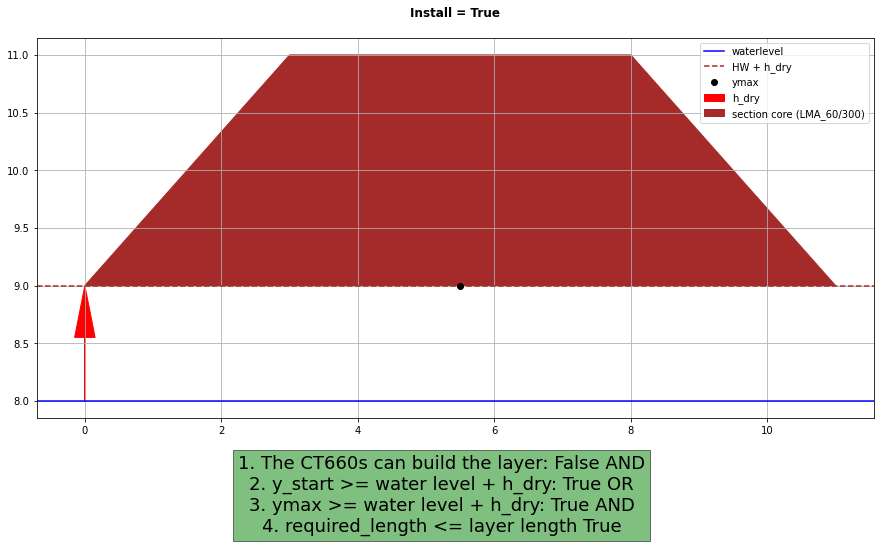

In [4]:
section = [(0, 9), (3, 11), (8, 11), (11, 9)]
x,y = list(zip(*section))
y_start = min(y)
ymax = y_start
install = Truck.install(layer= 'core', 
                        grading_layer= 'LMA_60/300', 
                        section_coords = section,
                        ymax= ymax,
                        plot = True,
                        length_top = 5)



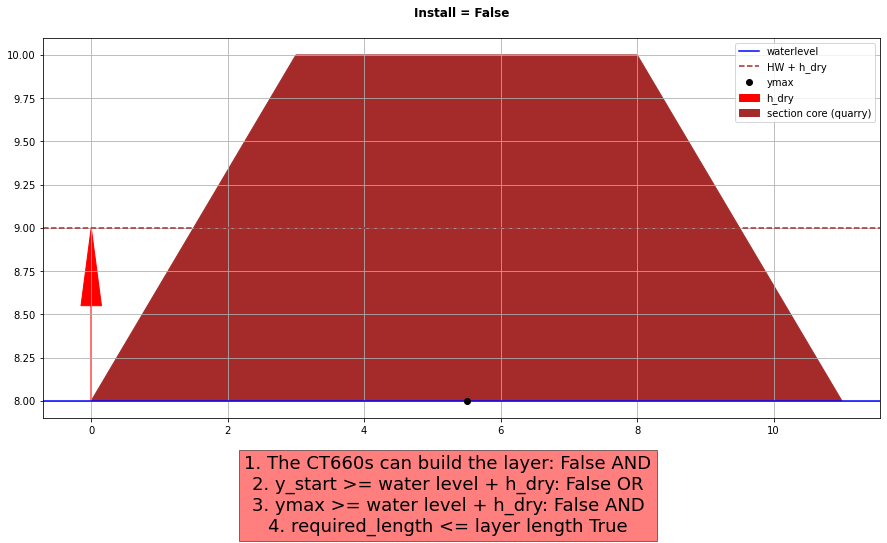

In [5]:
section = [(0, 8), (3, 10), (8, 10), (11, 8)]
x,y = list(zip(*section))
y_start = min(y)
ymax = y_start
install = Truck.install(layer= 'core', 
                        grading_layer= 'quarry', 
                        section_coords = section, 
                        ymax= ymax,
                        plot = True,
                        length_top =5)


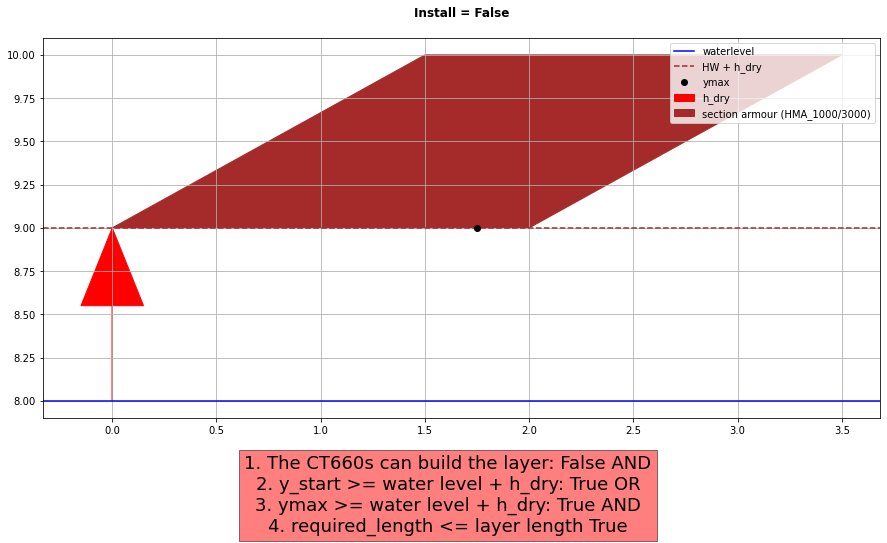

In [6]:
section = [(0, 9), (1.5, 10), (3.5, 10), (2, 9)]
x,y = list(zip(*section))
y_start = min(y)
ymax = y_start
install = Truck.install(layer= 'armour', 
                        grading_layer= 'HMA_1000/3000', 
                        section_coords = section,
                        ymax= ymax,
                        plot= True,
                        length_top = 5)


#### Building at another level

<img src="Images/truck2.PNG" alt="Drawing" style="width: 700px;"/>


<div class="alert alert-block alert-success">

<center>Install: $y_{max} - y_{waterlvl} \geq h_{dry}$

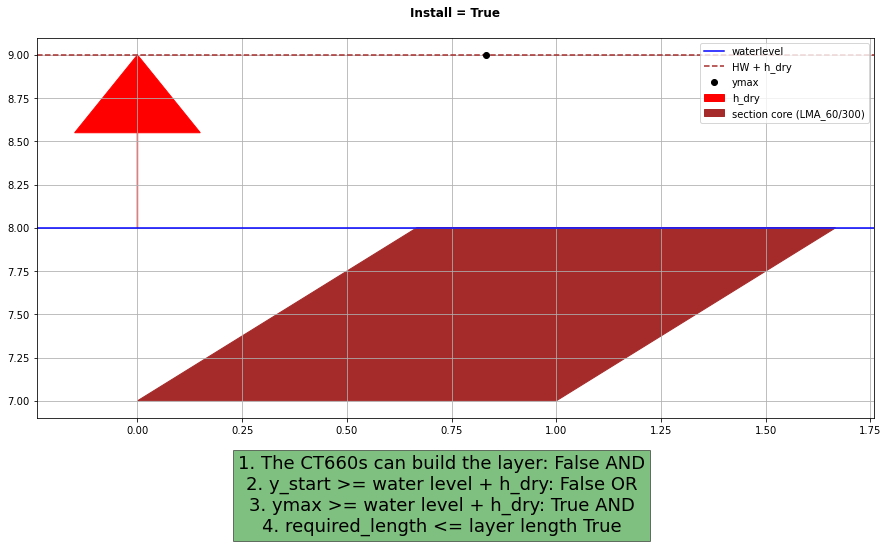

In [7]:
section = [(0, 7), (2/3, 8), (1+2/3, 8), (1, 7)]
section2 = [(1, 7), (2+1/3, 9), (5, 9), (6, 7)]
x,y = list(zip(*section))
x2,y2 = list(zip(*section2))
y_start = min(y)
ymax = max(y2)
install = Truck.install(layer= 'core', 
                        grading_layer= 'LMA_60/300', 
                        ymax= ymax,
                        section_coords = section,
                        length_top = 5,
                        plot= True)


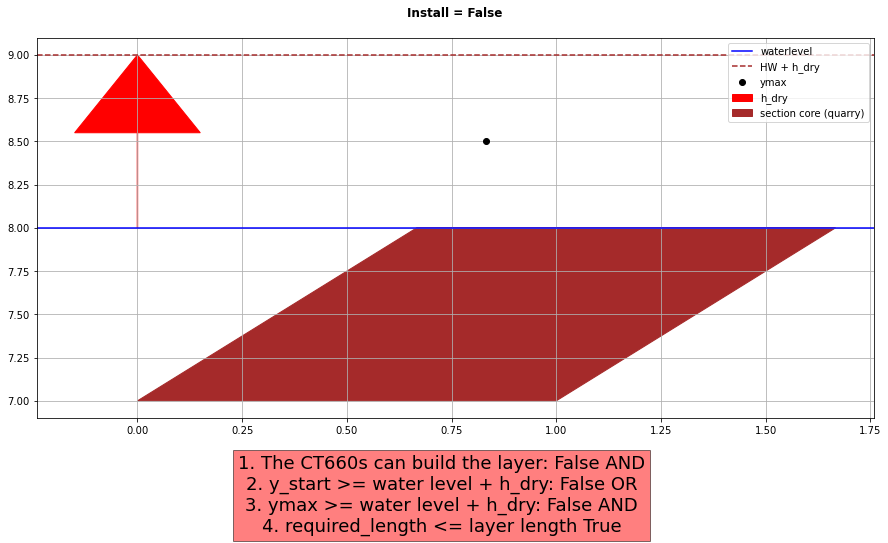

In [8]:
section = [(0, 7), (2/3, 8), (1+2/3, 8), (1, 7)]
section2 = [(1, 7), (2, 8.5), (5, 8.5), (6, 7)]
x,y = list(zip(*section))
x2,y2 = list(zip(*section2))
y_start = min(y)
ymax = max(y2)
install = Truck.install(layer= 'core', 
                        grading_layer= 'quarry', 
                        section_coords = section, 
                        ymax= ymax,
                        length_top = 5,
                        plot= True)


## <center> Excavators

<div class="alert alert-block alert-info">
    
Equipment:
HITACHI_EX1900
1. operation_type: individual
2. offset: 1 m
3. $h_{dry}$: 1 m

In [9]:
h_dry = 1
offset = 1
required_length = 15

Exc = bw.HITACHI_EX1900(
                            name= 'Hitachi', 
                            design_type = {'HMA_3000/10000': {'cost': 50, 'CO2': 2, 'production_rate': 0.5}}, 
                            mobilisation_cost = {'cost': 10000, 'CO2': 1000},
                            equipment_cost = {'cost': 50, 'CO2':1},
                            waterlvl= HW, 
                            h_dry= h_dry, 
                            offset= offset,
                            required_length = required_length
                           )

#### Building at own level

<img src="Images/excv1.PNG" alt="Drawing" style="width: 700px;"/>


<div class="alert alert-block alert-success">

<center>Install: $y_{start} - y_{waterlvl} \geq h_{dry}$

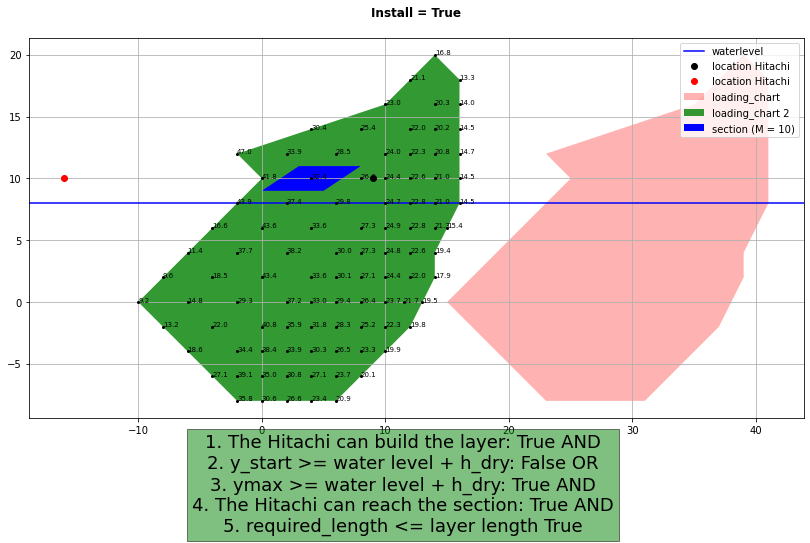

In [10]:
section = [(0, 9), (3, 11), (8, 11), (5, 9)]
mass= 10

install = Exc.install(layer= 'armour', 
                          grading_layer= 'HMA_3000/10000', 
                          ymax= 10,
                          section_coords= section, 
                          xmax_top= 10, 
                          mass= mass, 
                          length_top = 20, 
                          plot= True,
                          slope = (2,3))


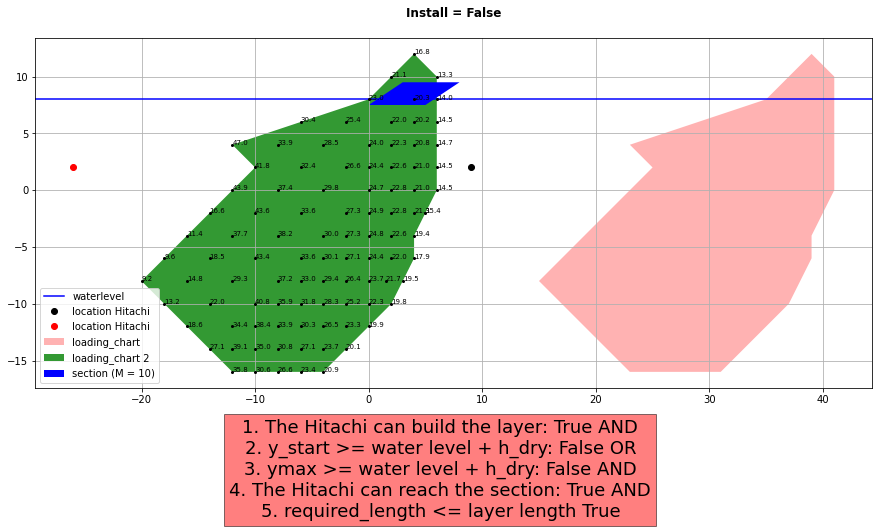

In [11]:
section = [(0, 7.5), (3, 9.5), (8, 9.5), (5, 7.5)]
mass= 10

install = Exc.install(layer= 'armour', 
                          grading_layer= 'HMA_3000/10000', 
                          ymax= 2,
                          section_coords= section, 
                          xmax_top= 10, 
                          mass= mass, 
                          length_top = 20, 
                          plot= True,
                          slope = (2,3))

#### Building at another level

<img src="Images/excv2.PNG" alt="Drawing" style="width: 700px;"/>

<div class="alert alert-block alert-success">

<center>Install: $y_{max} - y_{waterlvl} \geq h_{dry} \text{ and } M_{layer} \leq M_{min}[section]$ </center>

Where:
1. $M_{layer}$ = mass of the layer
2. $M_{min}[section]$ = minimum lift capacity from the loading chart at the section 

<img src="Images/HITACHI.PNG" alt="Drawing" style="width: 400px;"/>

The Hitachi can install the section: True, as the section falls within the loading chart and ymax (= 10) > HW+h_dry (= 9)


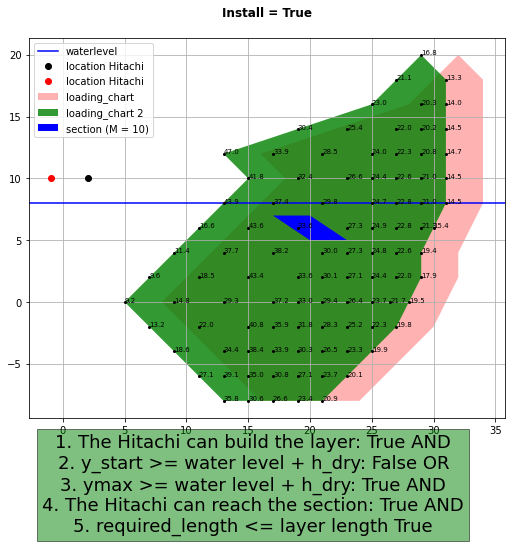

In [12]:
section = [(20, 5), (17, 7), (20, 7), (23, 5)]
mass = 10

install = Exc.install(layer= 'armour', grading_layer= 'HMA_3000/10000', ymax= 10,
                section_coords= section, xmax_top= 3, mass= mass,length_top = 20, plot= True,
                     slope = (2,3))

print(f'The Hitachi can install the section: {install}, as the section falls within the loading chart and ymax (= 10) > HW+h_dry (= {HW + h_dry})')

The Hitachi can install the section: True, as the equipment can be moved on the top layer.


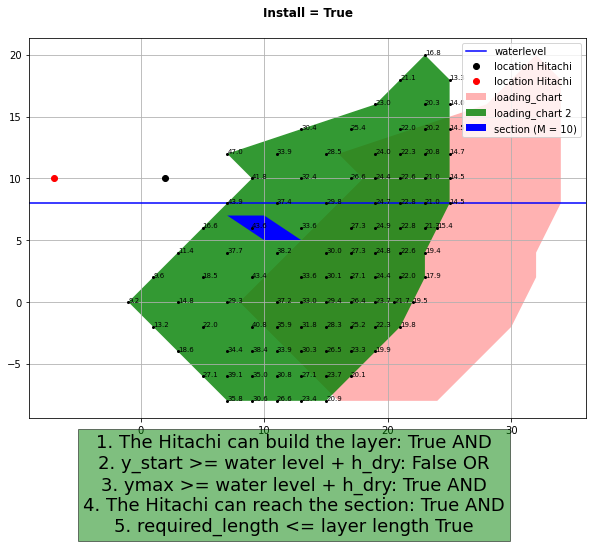

In [13]:
section = [(10, 5), (7, 7), (10, 7), (13, 5)]

mass = 10

install = Exc.install(layer= 'armour', grading_layer= 'HMA_3000/10000', ymax= 10,
                section_coords= section, xmax_top= 3, mass= mass, length_top = 20, plot= True, slope= (2,3))

print(f'The Hitachi can install the section: {install}, as the equipment can be moved on the top layer.')

The Hitachi can install the section: True, as the equipment can be moved on the top layer.


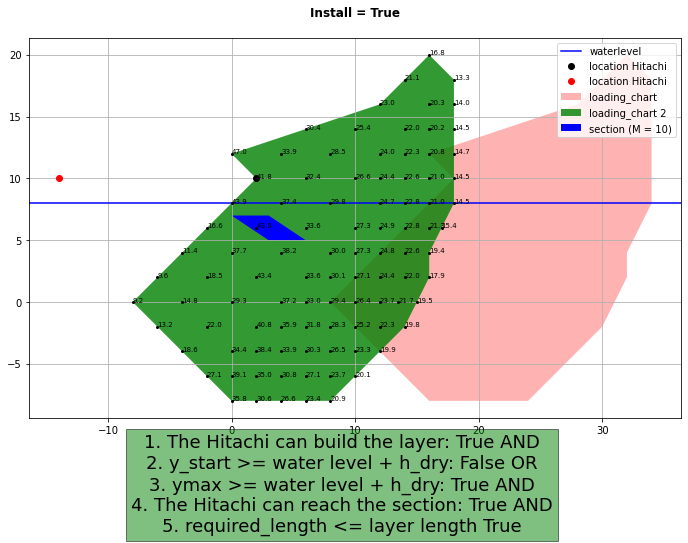

In [14]:
section = [(3, 5), (0, 7), (3, 7), (6, 5)]

mass = 10

install = Exc.install(layer= 'armour', grading_layer= 'HMA_3000/10000', ymax= 10,
                section_coords= section, xmax_top= 3, mass= mass, length_top = 20, plot= True, slope= (2,3))

print(f'The Hitachi can install the section: {install}, as the equipment can be moved on the top layer.')

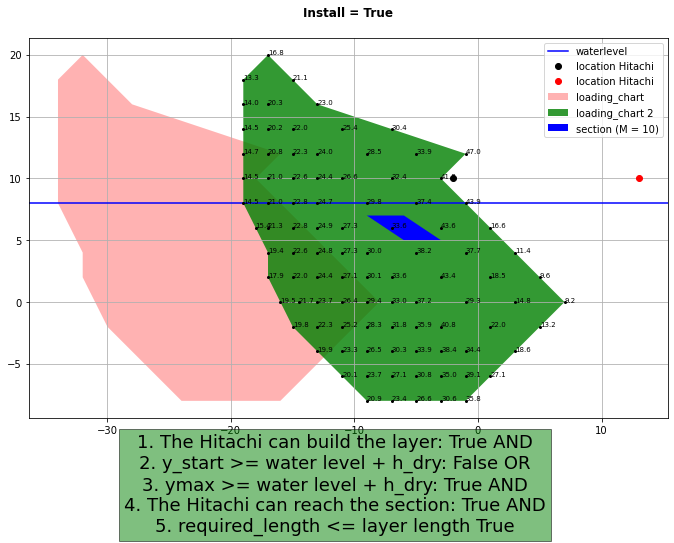

In [15]:
section = [(-6, 5), (-9, 7), (-6, 7), (-3, 5)]

mass = 10

install = Exc.install(layer= 'armour', grading_layer= 'HMA_3000/10000', ymax= 10,
                section_coords= section, xmax_top= 3, mass= mass, length_top = 20, plot= True, slope= (2,3))

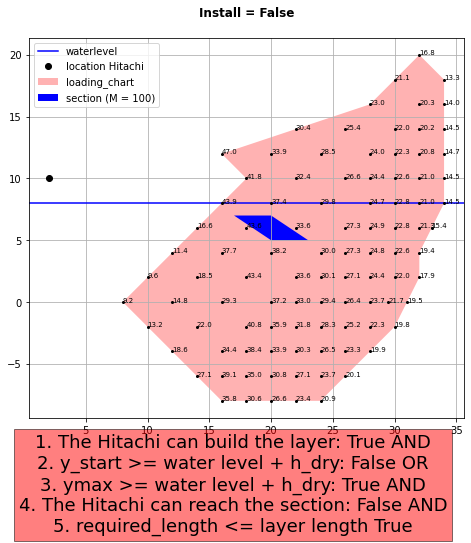

In [16]:
section = [(20, 5), (17, 7), (20, 7), (23, 5)]
mass = 100

install = Exc.install(layer= 'armour', grading_layer= 'HMA_3000/10000', ymax= 10,
                section_coords= section, xmax_top= 3, mass= mass, length_top = 20, plot= True, slope= (2,3))


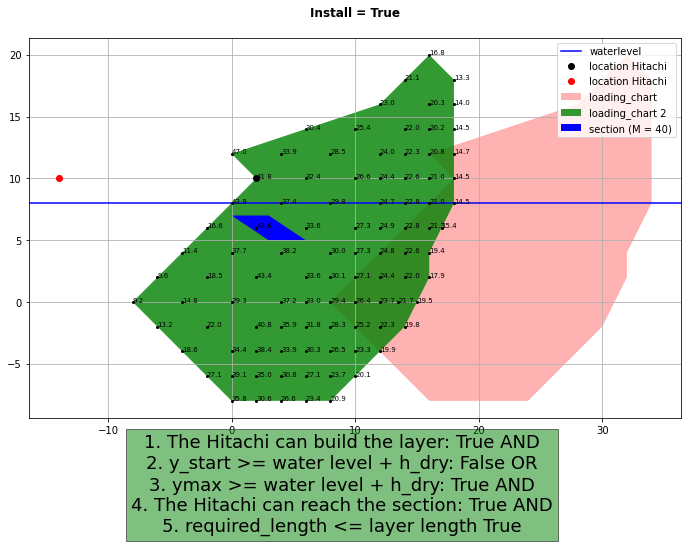

In [17]:
section = [(3, 5), (0, 7), (3, 7), (6, 5)]

mass = 40

install = Exc.install(layer= 'armour', grading_layer= 'HMA_3000/10000', ymax= 10,
                section_coords= section, xmax_top= 3, mass= mass, length_top = 20, plot= True, slope= (2,3))

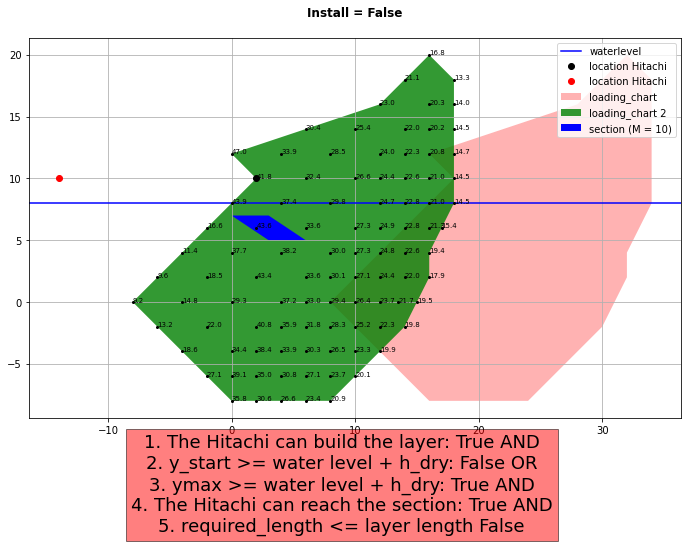

In [18]:
section = [(3, 5), (0, 7), (3, 7), (6, 5)]

mass = 10
length_top = 3

install = Exc.install(layer= 'armour', grading_layer= 'HMA_3000/10000', ymax= 10,
                section_coords= section, xmax_top= 3, mass= mass, length_top = length_top, plot= True, slope= (2,3))

## <center> Cranes

<div class="alert alert-block alert-info">
    
Equipment:
ATF 130G-5 42.3t
1. operation_type: individual
2. offset: 1 m
3. $h_{dry}$: 1 m

#### Building at own level

$\textit{see crawler}$


<div class="alert alert-block alert-success">

<center>Install: $y_{start} - y_{waterlvl} \geq h_{dry}$

#### Building at own level

$\textbf{Make an Image}$

<div class="alert alert-block alert-success">

<center>Install: $y_{max} - y_{waterlvl} \geq h_{dry} \text{ and } M_{layer} \leq M_{max}$ </center>

Where:
1. $M_{layer}$ = mass of the material of the layer
2. $M_{max}$ = maximum lifting capacity at the maximum distance between section and equipment
3. Loading chart: 

In [19]:
import tabula

file = "Images/crane_load.pdf"
 
tables = tabula.read_pdf(file, pages = "all", multiple_tables = True)

df = tables[0]
df = df.set_index('Unnamed: 0')
df.columns = df.iloc[1]
df = df.loc[df.index.dropna()]
df.index = df.index.rename(name= 'Radius')
df.columns.name = None
df.drop(['m'], axis=1, inplace= True)
df = df.replace('\**','', regex=True)
df.rename(columns= {'12.8 m 17.1 m': '12.8 m', df.columns[2]: '17.1 m'}, inplace= True)

for i in range(len(df['12.8 m'])):
    if type(df['12.8 m'].iloc[i]) != float:
        l = df['12.8 m'].iloc[i].split(' ')
        df['17.1 m'].iloc._setitem_with_indexer(i, l[-1])
        if len(l) > 1:
            df['12.8 m'].iloc._setitem_with_indexer(i, l[0])
        else:
            df['12.8 m'].iloc._setitem_with_indexer(i, np.nan)
            
for c in df.columns:
    c_new = c.split(' ')[0]
    df.rename(columns= {c: c_new}, inplace= True)
    
loading_chart = df.astype(float)
loading_chart

,12.8,12.8,17.1,21.4,25.8,30.1,34.4,38.7,43.0,47.4,51.7,56.0,60.0
Radius,,,,,,,,,,,,,
2.7,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,111.2,104.7,90.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.5,99.7,95.7,90.0,90.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,91.4,88.1,88.0,87.6,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.5,83.3,81.5,81.4,81.0,70.0,54.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,75.8,75.8,75.7,75.3,70.0,51.3,44.0,NaN,NaN,NaN,NaN,NaN,NaN
6.0,66.3,66.2,66.1,65.6,66.0,50.0,42.3,32.8,NaN,NaN,NaN,NaN,NaN
7.0,58.8,58.1,58.3,57.5,58.1,49.3,38.4,32.8,27.1,NaN,NaN,NaN,NaN
8.0,52.7,51.2,51.6,51.4,51.1,46.0,38.0,32.8,27.1,21.4,NaN,NaN,NaN


In [20]:
offset = 1
h_dry = 1

Crane = bw.Crane(
                    name= 'ATF', 
                    design_type= {'28t': {'cost': 50, 'CO2': 2, 'production_rate': 0.5}}, 
                    mobilisation_cost = {'cost': 10000, 'CO2': 1000},
                    equipment_cost = {'cost': 50, 'CO2':1},
                    waterlvl = HW, 
                    loading_chart = loading_chart,
                    required_length = 20,
                    h_dry = h_dry, 
                    offset = offset
                )

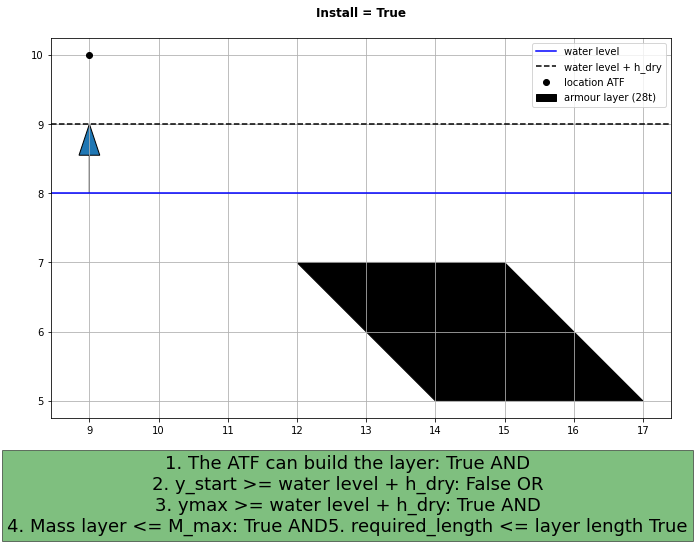

In [21]:
section = [(14, 5), (12, 7), (15, 7), (17, 5)]
section2 = [(1, 5), (5, 10), (10, 10), (14, 5)]
mass = 10
ymax = 10
xmax_top = 10

install = Crane.install(
                        layer = 'armour', 
                        grading_layer = '28t', 
                        ymax = 10, 
                        section_coords = section,
                        length_top = 25,
                        xmax_top = xmax_top, 
                        mass = mass,
                        plot = True,
                        slope= (2,3)
                       )



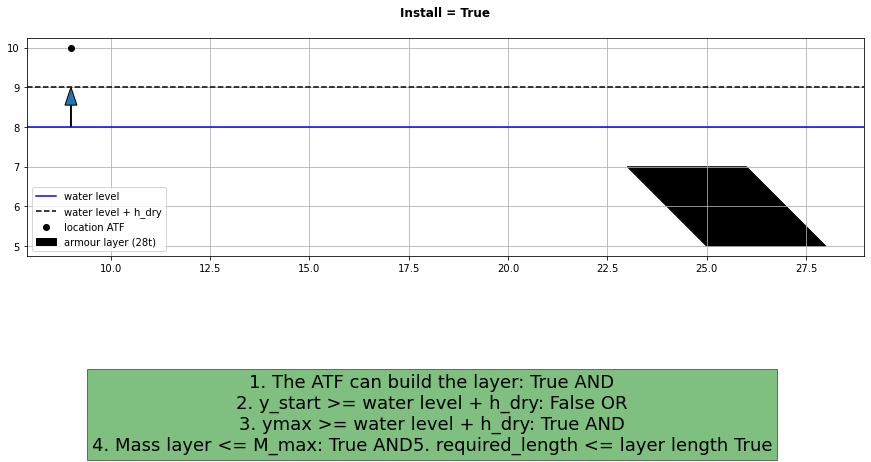

In [22]:
section = [(25, 5), (23, 7), (26, 7), (28, 5)]
section2 = [(1, 5), (5, 10), (10, 10), (14, 5)]
mass = 10
ymax = 10
xmax_top = 10

install = Crane.install(
                        layer = 'armour', 
                        grading_layer = '28t', 
                        ymax = 10, 
                        section_coords = section,
                        length_top = 25,
                        xmax_top = xmax_top, 
                        mass = mass,
                        plot = True,
                        slope= (2,3)
                       )



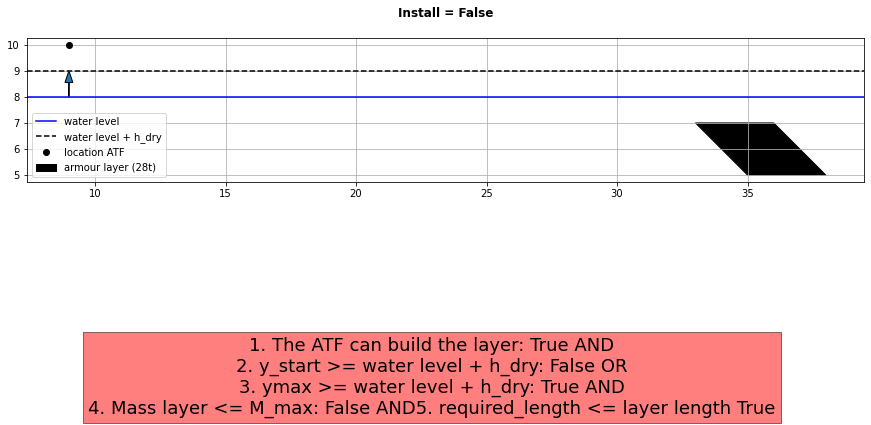

In [23]:
section = [(35, 5), (33, 7), (36, 7), (38, 5)]
section2 = [(1, 5), (5, 10), (10, 10), (14, 5)]
mass = 10
ymax = 10
xmax_top = 10

install = Crane.install(
                        layer = 'armour', 
                        grading_layer = '28t', 
                        ymax = 10, 
                        section_coords = section,
                        length_top = 25,
                        xmax_top = xmax_top, 
                        mass = mass,
                        plot= True,
                        slope= (2,3)
                       )


## <center> Vessels

<div class="alert alert-block alert-info">
    
Equipment: HAM 602 (side stone dumper)
1. operation_type: bulk
2. draught: 4.80 m

<img src="Images/vessel.PNG" alt="Drawing" style="width: 700px;"/>

<div class="alert alert-block alert-success">

<center>Install: $y_{waterlvl} - (\text{draft}) \geq y_{end} + \text{margin}$ </center>

Where:
1. draft = maximum draft of the vessel including a barge
2. margin = distance to ensure safe navigability (default is 1 m)

In [24]:
draught = 4.08

SSD = bw.Vessel(name= 'HAM602', 
                design_type= {'quarry': {'cost': 310, 'CO2': 2, 'production_rate': 0.8}, 
                              'HMA_30/100': {'cost': 310, 'CO2': 2, 'production_rate': 0.8}}, 
                mobilisation_cost = {'cost': 10000, 'CO2': 1000},
                equipment_cost = {'cost': 50, 'CO2':1},
                waterlvl= LW,
                installation_waterdepth = draught,
                ukc = 1)

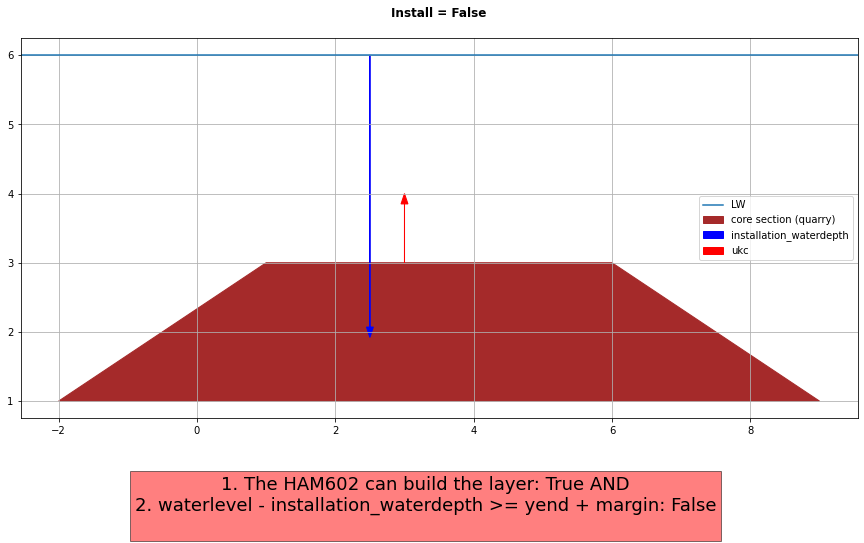

In [25]:
section = [(-2, 1), (1, 3), (6, 3), (9, 1)]
x,y = list(zip(*section))
end_section = max(y)

install = SSD.install(section_coords = section, layer= 'core', grading_layer= 'quarry', plot= True)


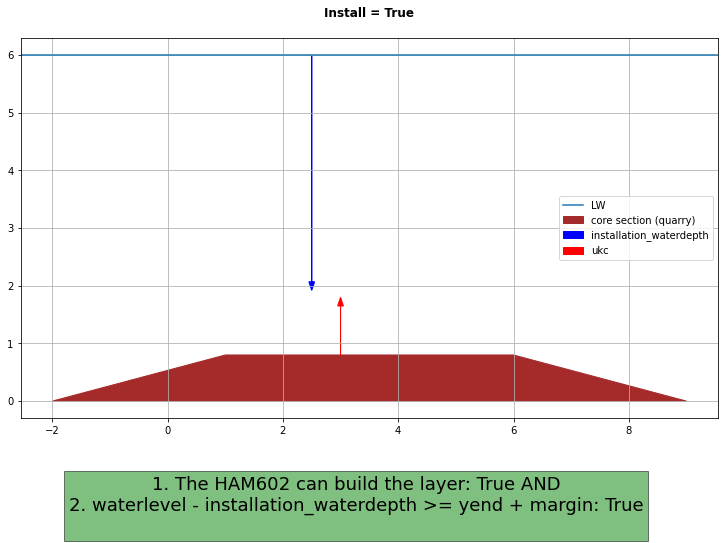

In [26]:
section = [(-2, 0), (1, 0.8), (6, 0.8), (9, 0)]
x,y = list(zip(*section))

install = SSD.install(section_coords = section, layer= 'core', grading_layer= 'quarry', plot= True)


## <center> Barges and Landbased equipment

<div class="alert alert-block alert-info">
    
Equipment: Scheldeoord with either crane or crawler
1. operation_type: individual
2. draught: 1.8 m
3. height: 3.0 m

#### No depth limitation

<img src="Images/barge2.PNG" alt="Drawing" style="width: 700px;"/>


<div class="alert alert-block alert-success">

1. Install crane: always. Barge can freely move around so there is no limitation in range. The crane has no depth limitation. $\newline$
2. Install crawler: $M_{layer} \leq M[y_{equipment} - y_{start}]$, make image here. $\newline$ There is only depth limitation which is estimated by the difference between the y-coordinate of the equipment and the y-coordinate of the start of the section.

In [27]:
draught = 1.8
height = 3.0
ukc = 1

Barge_crane = bw.Barge(
                    name = 'Scheldeoord',
                    mobilisation_cost = {'cost': 10000, 'CO2': 1000},
                    equipment_cost = {'cost': 50, 'CO2':1},
                    waterlvl = LW, 
                    other = Crane, # The crane is placed on the barge
                    installation_waterdepth = draught,
                    downtime_production= 100,
                    extra_cost= 50,
                    height = height,
                    ukc = ukc
                )

Barge_crawler = bw.Barge(
                    name = 'Scheldeoord', 
                    mobilisation_cost = {'cost': 10000, 'CO2': 1000},
                    equipment_cost = {'cost': 50, 'CO2':1},
                    waterlvl = LW, 
                    other = Exc, # The crawler is placed on the barge
                    installation_waterdepth = draught,
                    downtime_production= 100,
                    extra_cost= 50,
                    height = height,
                    ukc = ukc
                )

In [28]:
section = [(2, 0), (1, 2), (3, 2), (4, 0)]
x,y = list(zip(*section))
end_section = max(y)


install = Barge_crane.install(layer = 'armour', 
                              grading_layer = '28t', 
                              slope = (2, 3), 
                              section_coords = section, 
                              xmax_top = 5, 
                              mass = 20, 
                              plot =True)



TypeError: install() missing 1 required positional argument: 'length_top'

In [ ]:
section = [(2, 3), (1, 5), (3, 5), (4, 3)]
x,y = list(zip(*section))
end_section = max(y)
mass = 5


install = Barge_crawler.install(
                              layer= 'armour', 
                              grading_layer= 'HMA_3000/10000', 
                              slope = (2, 3), 
                              section_coords = section, 
                              xmax_top = 5, 
                              mass = mass,
                              plot = True)


#### Depth limitation

<img src="Images/barge1.PNG" alt="Drawing" style="width: 700px;"/>


<div class="alert alert-block alert-success">

<center>Install crane: always. Barge can freely move around so there is no limitation in range. The crane has no depth limitation. $\newline$
Install crawler:    

In [ ]:
section = [(2, 2), (1, 4), (3, 4), (4, 2)]
x,y = list(zip(*section))
end_section = max(y)
mass = 10

install = Barge_crane.install(layer = 'armour', 
                              grading_layer = '28t', 
                              slope = (2, 3), 
                              section_coords = section, 
                              xmax_top = 5, 
                              mass = 20,
                              plot= True)


In [ ]:
section = [(3, -3), (1, -1), (5, -1), (7, -3)]
x,y = list(zip(*section))
end_section = max(y)

mass = 10

install = Barge_crawler.install(layer= 'armour', 
                              grading_layer= 'HMA_3000/10000',
                              slope = (2, 3), 
                              section_coords = section, 
                              xmax_top = 5, 
                              mass = mass,
                              plot = True)